<a href="https://colab.research.google.com/github/rishisg/AI-Agent-Sales-Auto-Report/blob/main/DL_ANN_Diabetes_Prediction_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

📌 Diabetes Prediction using TensorFlow
✅ Dataset: diabetes.csv ✅ Goal: Predict whether a patient has diabetes (Binary Classification: Diabetes (1) or No Diabetes (0)) ✅ Approach: Train a Neural Network (ANN) with TensorFlow ✅ Evaluation: Accuracy, Precision, Recall, F1-score, ROC-AUC

1️⃣ Setup & Import Libraries

💡 Explanation
🔹 pandas → Handles dataset 🔹 numpy → Works with numerical data 🔹 matplotlib & seaborn → Used for visualizations 🔹 tensorflow & keras → Used for deep learning model 🔹 sklearn → Used for splitting data, scaling values, and evaluation metrics

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve


2️⃣ Load & Explore the Dataset

💡 Explanation
✅ Loads the dataset into df ✅ Shows column names, missing values, and data types ✅ Displays sample data to understand the structure ✅ Outcome column → Diabetes = 1, No Diabetes = 0 (Binary Classification)

In [2]:
df = pd.read_csv("diabetes.csv")  # Load dataset
print(df.info())  # Display dataset details
print(df.head())  # Show first few rows
print(df["Outcome"].value_counts())  # Check distribution of diabetes vs. non-diabetes patients


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8     

3️⃣ Data Preprocessing

💡 Explanation
✅ Checks missing values (Important for clean data) ✅ Splits dataset into X (health indicators) and y (diabetes labels) ✅ Stratified split → Keeps diabetes/non-diabetes ratio balanced ✅ Standardization → Improves model performance

In [3]:
# Check for missing values
print(df.isnull().sum())

# Separate features and target labels
X = df.drop("Outcome", axis=1)  # Features (health indicators)
y = df["Outcome"]  # Target labels (Diabetes = 1, No Diabetes = 0)

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize numerical values
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


4️⃣ Build Neural Network Model

💡 Explanation
✅ First hidden layer → Uses ReLU for better learning ✅ Dropout → Prevents overfitting by ignoring random neurons ✅ Sigmoid output layer → Outputs probability (0 = No Diabetes, 1 = Diabetes) ✅ Binary cross-entropy loss function → Best for classification problems

In [4]:
model = Sequential([
    Dense(64, activation="relu", input_shape=(X_train.shape[1],)),  # First hidden layer with 64 neurons
    Dropout(0.3),  # Prevents overfitting
    Dense(32, activation="relu"),  # Second hidden layer
    Dense(1, activation="sigmoid")  # Output layer (probability prediction)
])

# Compile model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


5️⃣ Train the Model

💡 Explanation
✅ Trains the model for 50 epochs ✅ Batch size: 32 (Processes data in small chunks) ✅ Validation split: 20% of data used for validation

In [5]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)


Epoch 1/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.6585 - loss: 0.6530 - val_accuracy: 0.6748 - val_loss: 0.5967
Epoch 2/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6783 - loss: 0.6084 - val_accuracy: 0.7561 - val_loss: 0.5403
Epoch 3/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7157 - loss: 0.5562 - val_accuracy: 0.8049 - val_loss: 0.4971
Epoch 4/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7764 - loss: 0.5193 - val_accuracy: 0.7967 - val_loss: 0.4686
Epoch 5/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7988 - loss: 0.4825 - val_accuracy: 0.7886 - val_loss: 0.4518
Epoch 6/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8008 - loss: 0.4533 - val_accuracy: 0.7805 - val_loss: 0.4398
Epoch 7/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8054 - loss: 0.4598 - val_accuracy: 0.7886 - val_loss: 0.4329
Epoch 8/50
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7460 - loss: 0.4902 - val_accuracy: 0.7805 - val_loss

6️⃣ Evaluate Model Performance

💡 Explanation
✅ Evaluates model performance with key metrics ✅ Precision & Recall are important for diabetes detection ✅ Higher Recall means fewer diabetic patients are missed

In [6]:
# Make predictions
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities into 0 or 1

# Compute Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Accuracy: 0.75
Precision: 0.65
Recall: 0.61
F1 Score: 0.63
ROC-AUC: 0.72


7️⃣ Visualizing Results

📌 Confusion Matrix & 📌 ROC Curve

💡 Explanation
✅ Confusion Matrix → Shows how many diabetes cases were correctly identified ✅ ROC Curve → Measures how well the model distinguishes diabetic vs. non-diabetic patients

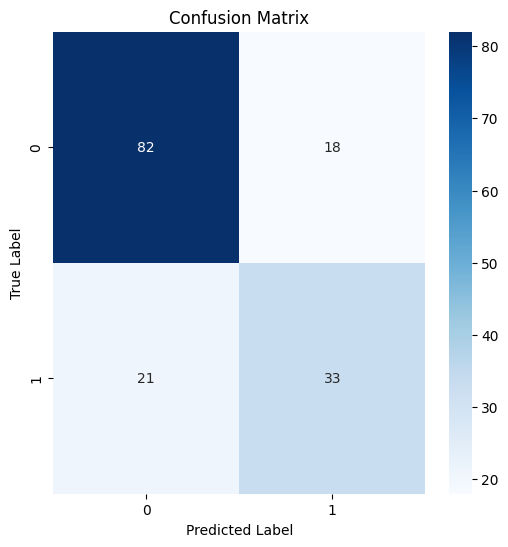

In [7]:
# 📌 Confusion Matrix

plt.figure(figsize=(6,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


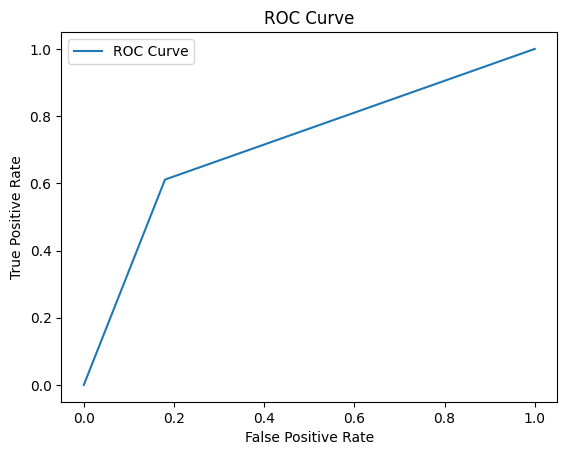

In [8]:
# 📌 ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()


8️⃣ Hyperparameter Tuning

💡 Explanation
✅ Tests different neuron counts, dropout rates, learning rates ✅ Finds best model configuration automatically

In [10]:
!pip install keras-tuner
import keras_tuner as kt

def build_model(hp):
    model = Sequential()
    model.add(Dense(hp.Int("units", min_value=32, max_value=128, step=32), activation="relu", input_shape=(X_train.shape[1],)))
    model.add(Dropout(hp.Float("dropout", min_value=0.2, max_value=0.5, step=0.1)))
    model.add(Dense(1, activation="sigmoid"))

    model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
    return model

tuner = kt.RandomSearch(build_model, objective="val_accuracy", max_trials=5)
tuner.search(X_train, y_train, epochs=50, validation_split=0.2)


Trial 5 Complete [00h 00m 08s]
val_accuracy: 0.8292682766914368

Best val_accuracy So Far: 0.8292682766914368
Total elapsed time: 00h 00m 41s


9️⃣ K-Fold Cross-Validation

💡 Explanation
✅ Tests model performance on different splits of data ✅ Ensures model generalizes well

In [12]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for train_idx, test_idx in kf.split(X):
    X_train_kfold, X_test_kfold = X.iloc[train_idx], X.iloc[test_idx]
    y_train_kfold, y_test_kfold = y.iloc[train_idx], y.iloc[test_idx]

    # Train model
    model.fit(X_train_kfold, y_train_kfold, epochs=30, batch_size=16, verbose=0)

    # Evaluate on validation set
    loss, accuracy = model.evaluate(X_test_kfold, y_test_kfold, verbose=0)
    print(f"K-Fold Accuracy: {accuracy:.2f}")


K-Fold Accuracy: 0.73
K-Fold Accuracy: 0.71
K-Fold Accuracy: 0.67
K-Fold Accuracy: 0.72
K-Fold Accuracy: 0.75
